# Лабораторная работа №1. Настройка окружения и разведочный анализ данных.

## Цель работы

Подготовить структуру проекта и провести разведочный анализ данных. Результаты первой лабораторной работы будут использоваться в дальнейшем цикле работ.

## Выполнение работы

Был выбран датасет для дальнейшей работы:
    Car Price prediction

Была создана основная директория с проектом. 
Сделала это в домашней директории ~/ виртуальной машины. 
На рабочий стол вынесен ярлык к домашней директории (Home). 
В ней была создана новая папка, в которой будет находится проект, под названием car_price_pred. 
Таким образом, полный путь до папки: /home/alyona/car_price_pred или просто ~/car_price_pred.

Структурируем основную директорию таким образом, чтобы все ключевые этапы, модули и данные находились в своих папках. 
На данном этапе были созданы две директории: data и eda.

В первой будут храниться исходные данные, а также, те, которые могут в дальнейшем возникнуть в ходе создания проекта. В директории eda будут храниться артефакты, связанные с разведочным анализом данных: блокнот с проведенныеми исследованиями и сохраненные графики. 

### 0 Запуск

   1. git clone https://github.com/Vivaldition/IIS
   2. cd IIS
   3. python3 -m venv # установка окружения
   4. source .venv/bin/activate # активация окружения
   5. pip install -r requirement.txt # установка зависимостей



### 1. Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

### 2. Загрузка данных

In [2]:
df = pd.read_csv('/home/alyona/car_price_pred/data/car_data.csv')

print("Размер данных:", df.shape)  
print("Столбцы:", list(df.columns))  
print("\nПервые 5 строк:")

df.head()  

Размер данных: (301, 9)
Столбцы: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Первые 5 строк:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Основная информация о данных

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()  

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### 4. Проверка на пропуски и дубликаты

In [5]:
print("Пропущенные значения в каждом столбце:")
print(df.isnull().sum())  

duplicates = df.duplicated().sum()  
print(f"\nКоличество дубликатов: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()  
    print(f"Удалили {duplicates} дубликатов")
else:
    print("Дубликатов нет")

Пропущенные значения в каждом столбце:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Количество дубликатов: 2
Удалили 2 дубликатов


### 5. Анализ категориальных признаков

In [6]:
print(df['Selling_Price'].describe())

count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64


In [7]:
numeric_features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'

In [8]:
len(categorical_features)

3

Вывод: Датасет состоит из 301 строки и 9 столбцов, а после удаления дубликатов получается 299 строк. Пропущенных значений невыявлено. Целевой перменной является Selling_Price, которая измеряется в lakh. Минимум 0.10 lakh, а максимум 35 lakh. Среднее значение равно 4.66, а медиана 3.60.

### 6. Очистка данных и сохранение в новый файл

In [9]:
df = df[df['Year'] > 0]             
df = df[df['Selling_Price'] > 0]   
df = df[df['Present_Price'] > 0]   
df = df[df['Driven_kms'] >= 0]     
df = df[df['Owner'] >= 0]   

df['Car_Age'] = 2025 - df['Year'] 

print("Была добавлена 1 новая переменная")
print("Размер DataFrame после очистки:", df.shape)

print("\nПервые 5 строк с новым признаком:")
df[['Car_Name', 'Year', 'Car_Age']].head()

Была добавлена 1 новая переменная
Размер DataFrame после очистки: (299, 10)

Первые 5 строк с новым признаком:


,Car_Name,Year,Car_Age
0,ritz,2014,11
1,sx4,2013,12
2,ciaz,2017,8
3,wagon r,2011,14
4,swift,2014,11


Вывод: Были установлены фильтра на отрицательные и в некоторых случаях на нулевые значения. После очистки не было выявлено невалидных данных. Также была добавлена новая пересенная "Возраст машины". Других фильтров не было установлено, так как значения, находящиеся в выборке имеют место быть.

### 7. График 1 - распределение цен на машины

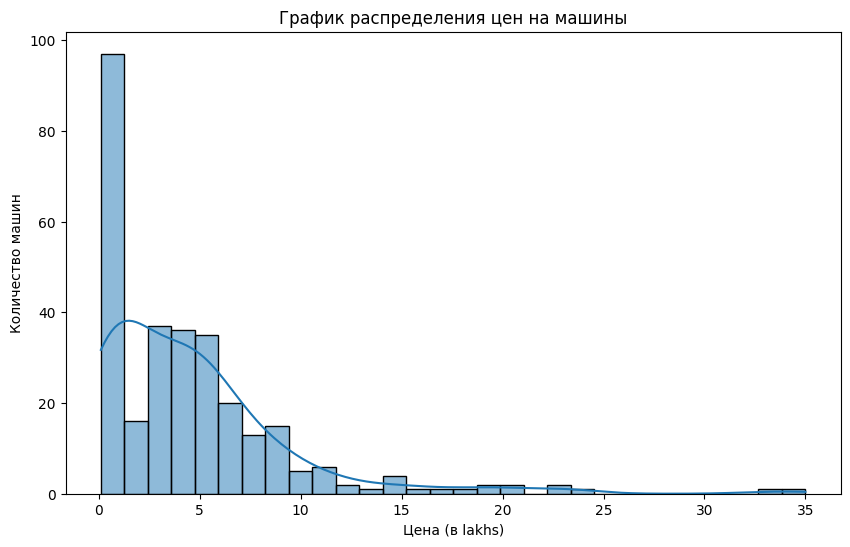

Вывод: Большинство машин имеет стоимость ниже или равную 10 lakhs, помимо этого присутствуют и дорогие варианты машин


In [10]:
plt.figure(figsize=(10, 6))  
sns.histplot(df['Selling_Price'], kde=True, bins=30)  
plt.title('График распределения цен на машины')  
plt.xlabel('Цена (в lakhs)')  
plt.ylabel('Количество машин')  
plt.savefig('цены_машин.png') 
plt.show()  

print("Вывод: Большинство машин имеет стоимость ниже или равную 10 lakhs, помимо этого присутствуют и дорогие варианты машин")

### 8. График 2 - цена и год выпуска

In [11]:
df = pd.read_csv("/home/alyona/car_price_pred/data/car_data.csv")

fig = px.scatter(
    df,
    x="Year",
    y="Selling_Price",
    color="Fuel_Type",
    title="Цена от года выпуска",
    labels={"Selling_Price": "Цена (lakhs)", "Year": "Год выпуска"},
    width=800, height=500
)
fig.show()

plt.figure(figsize=(8,5))
for fuel_type, group in df.groupby("Fuel_Type"):
    plt.scatter(group["Year"], group["Selling_Price"], label=fuel_type, alpha=0.7)

plt.xlabel("Год выпуска")
plt.ylabel("Цена (lakhs)")
plt.title("Цена от года выпуска")
plt.legend()
plt.grid(True)

plt.savefig("цена_и_год.png") 
plt.close()

print("Вывод: Исходя из графика можно сделать вывод, что машины имеющие дизельный двигатель внутреннего сгорания стоят дороже, нежели машины на природном газе и машины на бензине. Также по графику видно, что чем новее машина, тем она дороже")

Вывод: Исходя из графика можно сделать вывод, что машины имеющие дизельный двигатель внутреннего сгорания стоят дороже, нежели машины на природном газе и машины на бензине. Также по графику видно, что чем новее машина, тем она дороже


### 9. График 3 - корреляционная матрица

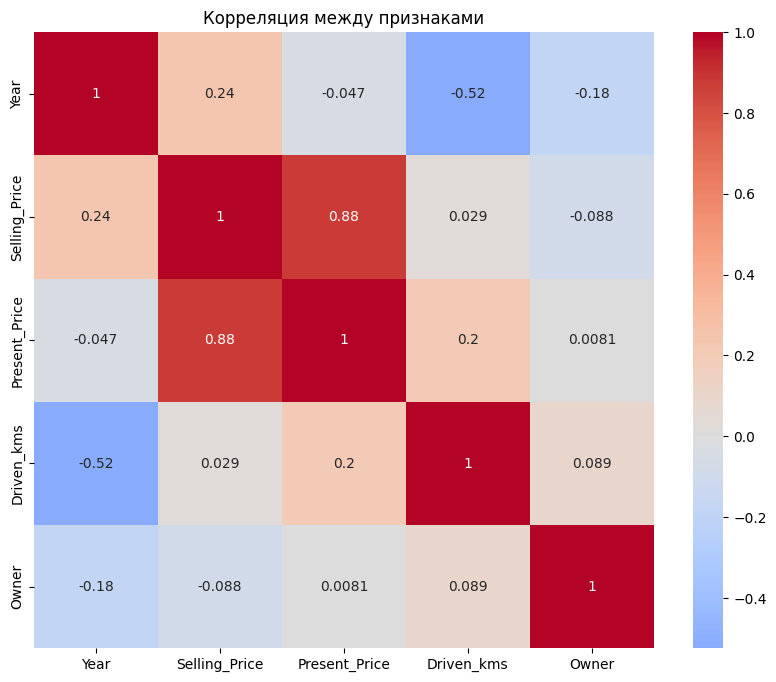

Вывод: Из матрицы корреляции видно, что год выпуска и текущая стоимость (Present_Price) сильно влияет- новые машины дороже и имеют наименьший пробег. Пробег (Driven_kms) и (Owner) оказывают слабое влияние на цену


In [12]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))  

sns.heatmap(numeric_df.corr(), 
            annot=True,     
            cmap='coolwarm', 
            center=0)       
plt.title('Корреляция между признаками')  
plt.savefig('корреляционная_матрица.png')  
plt.show()  

print("Вывод: Из матрицы корреляции видно, что год выпуска и текущая стоимость (Present_Price) сильно влияет- новые машины дороже и имеют наименьший пробег. Пробег (Driven_kms) и (Owner) оказывают слабое влияние на цену")

### 10. График 4 - цена по типам топлива

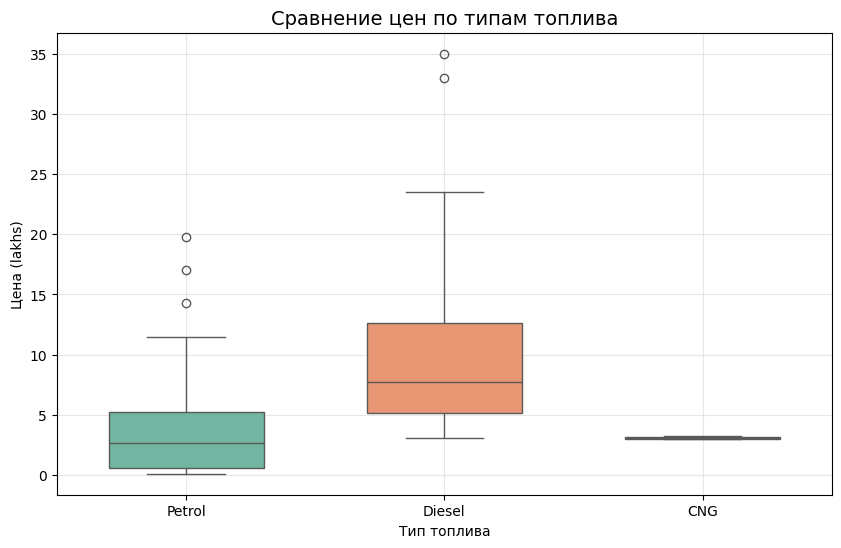

Вывод: Из диаграммы Тьюки видно, что машины работающие на дизеле стоят дороже


In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, 
            hue='Fuel_Type', 
            legend=False,     
            width=0.6,
            palette='Set2')

plt.title('Сравнение цен по типам топлива', fontsize=14)
plt.xlabel('Тип топлива')
plt.ylabel('Цена (lakhs)')
plt.grid(True, alpha=0.3)

plt.savefig('цена_по_типам_топлива.png')
plt.show()

print("Вывод: Из диаграммы Тьюки видно, что машины работающие на дизеле стоят дороже")

### 11. График 5 - цена от пробега

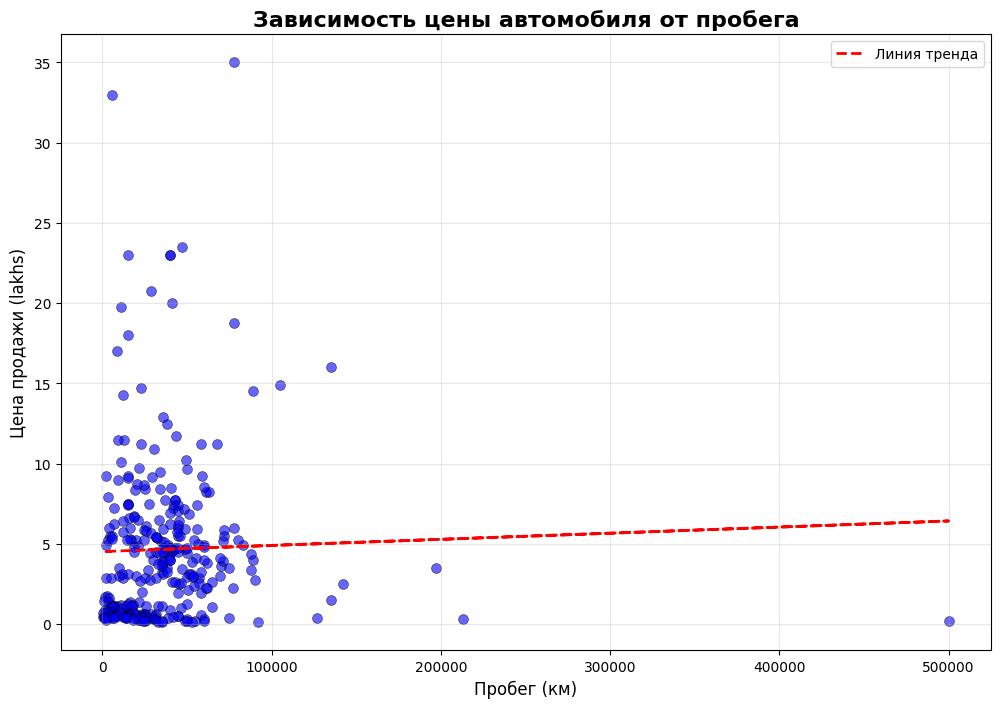

Коэффициент корреляции: 0.029
Вывод: Из графика видно, что машины, которые имеют минимальный пробег, имеют наибольшую цену. А машины, у которых пробег потихоньку дотягивать или переваливать за 100.000 км, цена снижается


In [14]:
plt.figure(figsize=(12, 8))

plt.scatter(df['Driven_kms'], df['Selling_Price'], 
            alpha=0.6,      
            s=50,           
            color='blue',   
            edgecolors='black', 
            linewidth=0.5)  


z = np.polyfit(df['Driven_kms'], df['Selling_Price'], 1)
p = np.poly1d(z)
plt.plot(df['Driven_kms'], p(df['Driven_kms']), 
         color='red', 
         linewidth=2, 
         linestyle='--',
         label='Линия тренда')

plt.title('Зависимость цены автомобиля от пробега', fontsize=16, fontweight='bold')
plt.xlabel('Пробег (км)', fontsize=12)
plt.ylabel('Цена продажи (lakhs)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)


plt.savefig('цена_от_пробега.png')
plt.show()


correlation = df['Selling_Price'].corr(df['Driven_kms'])
print(f"Коэффициент корреляции: {correlation:.3f}")

print("Вывод: Из графика видно, что машины, которые имеют минимальный пробег, имеют наибольшую цену. А машины, у которых пробег потихоньку дотягивать или переваливать за 100.000 км, цена снижается")

In [15]:
import os
os.makedirs('../data', exist_ok=True)  

df.to_pickle('../data/clean_car_data.pkl')

if os.path.exists('../data/clean_car_data.pkl'):
    file_size = os.path.getsize('../data/clean_car_data.pkl') / 1024
    print(f"Размер файла: {file_size:.1f} KB")

Размер файла: 16.5 KB


### 12. Сравнение цен по типам КПП

In [16]:
auto_price = df[df['Transmission'] == 'Automatic']['Selling_Price'].mean()
manual_price = df[df['Transmission'] == 'Manual']['Selling_Price'].mean()
price_diff = auto_price - manual_price
price_diff_percent = (price_diff / manual_price) * 100

print(f"- Автоматическая КПП: {auto_price:.2f} lakhs")
print(f"- Механическая КПП: {manual_price:.2f} lakhs")
print(f"- Разница: +{price_diff:.2f} lakhs ")

- Автоматическая КПП: 9.42 lakhs
- Механическая КПП: 3.93 lakhs
- Разница: +5.49 lakhs 


Вывод: По сравнению с механической коробкой передач, автоматическая выходит дороже.

### 13. Сохранение изменений в новый файл

In [17]:
os.makedirs('../data', exist_ok=True)

with open('../data/clean_car_data.pkl', 'wb') as f:
    pickle.dump(df, f)

print("DataFrame успешно сохранен в файл clean_car_data.pkl")

DataFrame успешно сохранен в файл clean_car_data.pkl


## Итоговые выводы

#### Пропущенных значений: нет

#### Дубликаты: удалены

##### - Год выпуска сильно влияет на цену: чем новее машины, тем выше у нее цена
##### - Дизельные машины дороже бензиновых и газовых
##### - При большом пробеге цена ниже
##### - Автоматические КПП увеличивают стоимость машины, так как на них ездить комфортнее
##### - Car_Age: возраст автомобиля в годах